# Data Visualization

##Check the relation between data and target "Chronic flag"

# Import needed libraries:

In [54]:
#1. Setup and import needed libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
import plotly.express as px

In [2]:
#Load Data:
Clean_df=pd.read_csv("C:/Users/Dell/Desktop/Aya Allam DEPI Project/Cleaned_diabetes_df.csv")

In [3]:
Clean_df.shape

(12345, 23)

In [4]:
Clean_df.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality_cleaned', 'Cultural_Tradition', 'Age', 'ERV_before',
       'IP_before'],
      dtype='object')

# Correlation matrix:

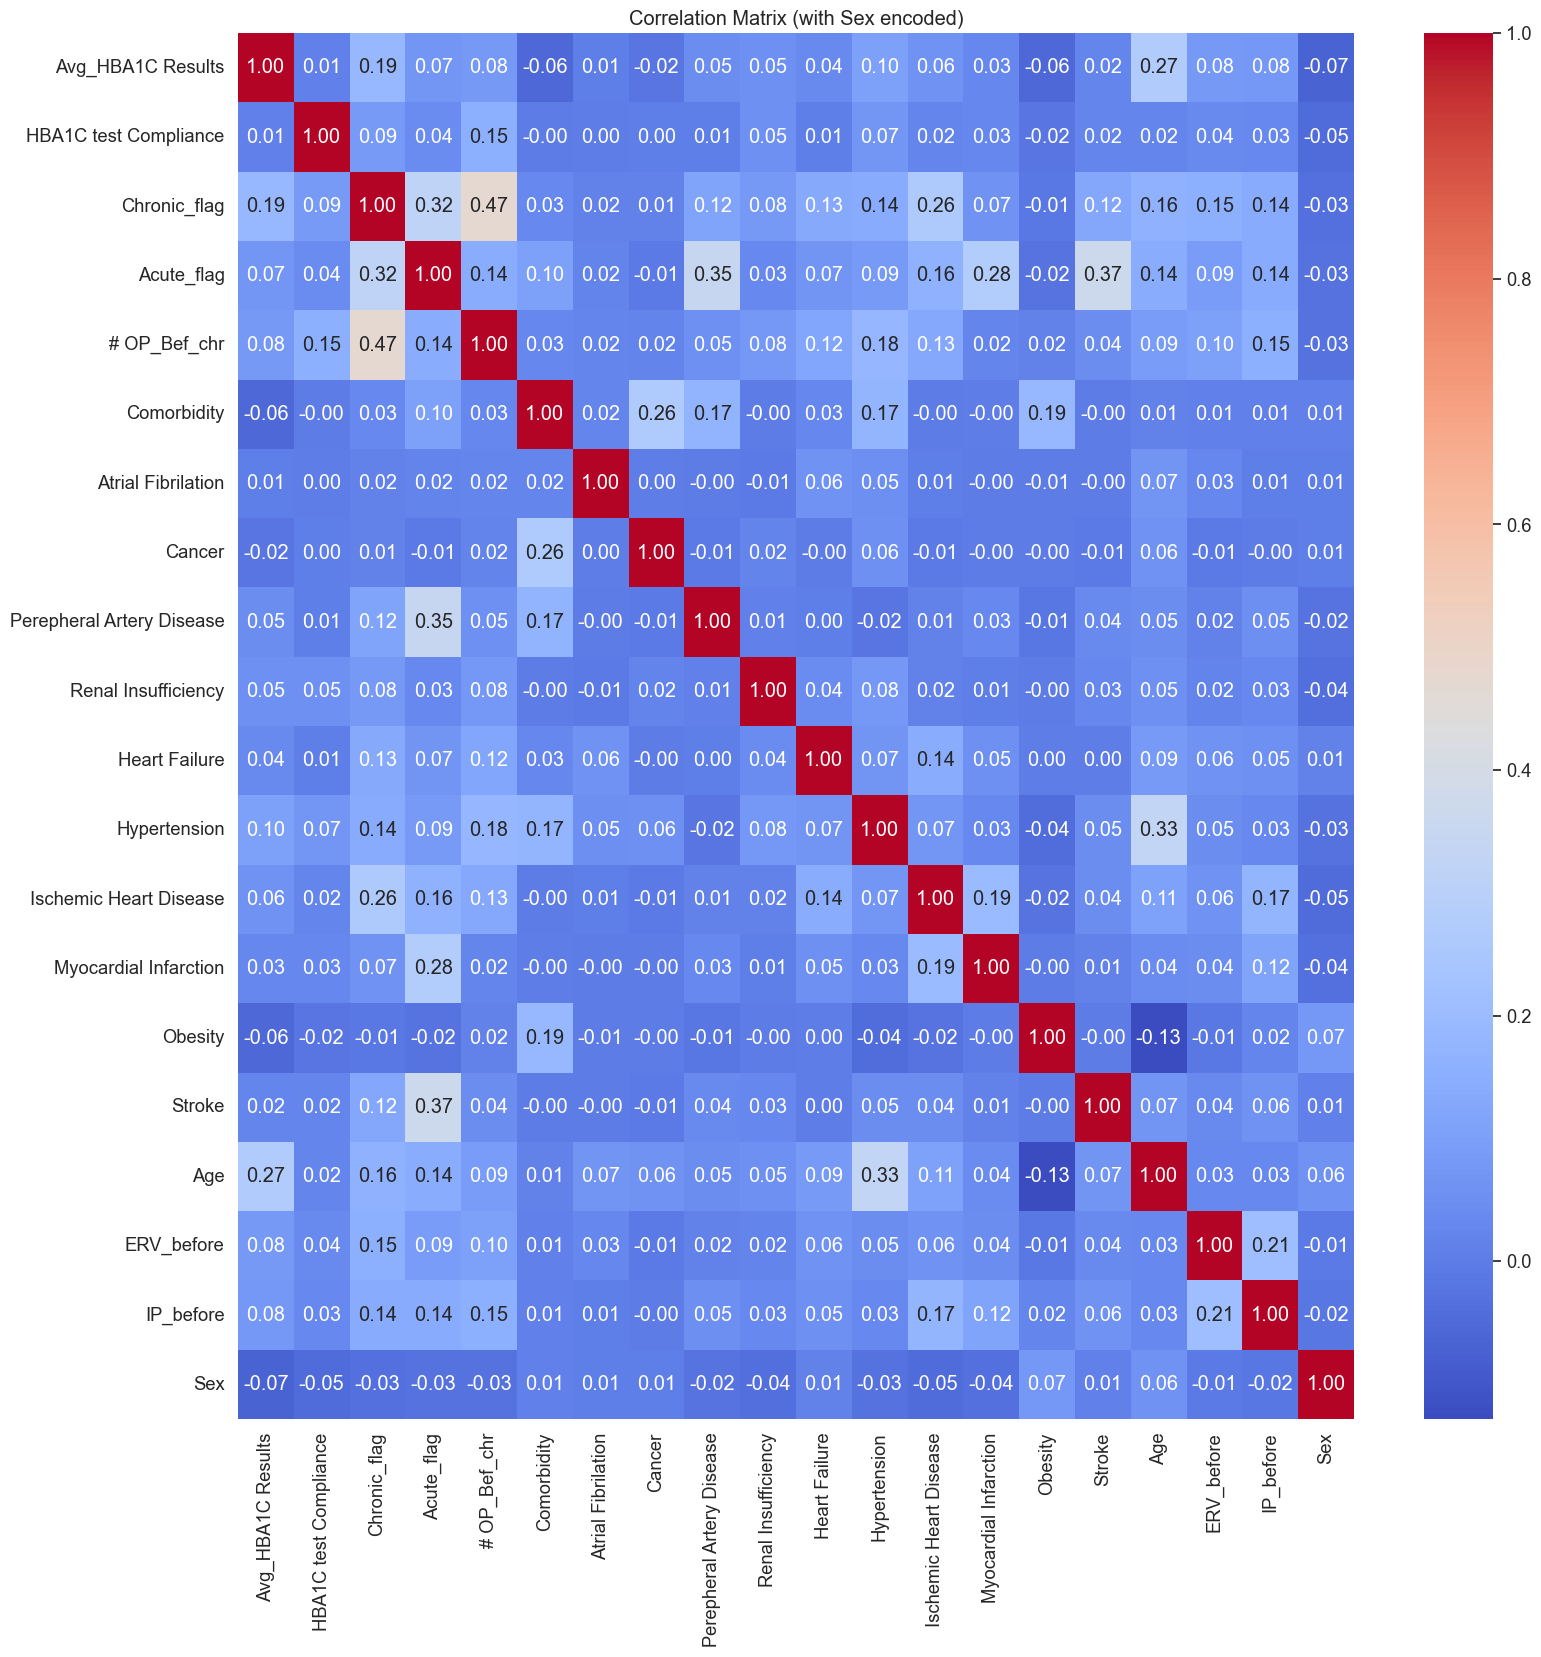

In [53]:
# Create a copy and encode 'Sex' to numeric values
plt.figure(figsize=(18,18))
df_corr = Clean_df.copy()
df_corr['Sex'] = df_corr['Gender'].map({'Male': 0, 'Female': 1})

# Compute correlation matrix on numeric columns only
corr_matrix = df_corr.corr(numeric_only=True)

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (with Sex encoded)")
plt.show()



# Target Distribution (Chronic Flag)

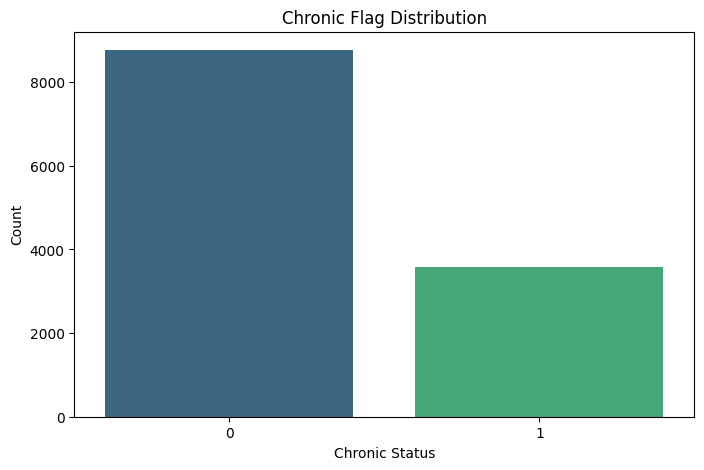

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='Chronic_flag', data=Clean_df, palette='viridis')
plt.title('Chronic Flag Distribution')
plt.xlabel('Chronic Status')
plt.ylabel('Count')
plt.show()


# 2) Distribution of columns across the data:

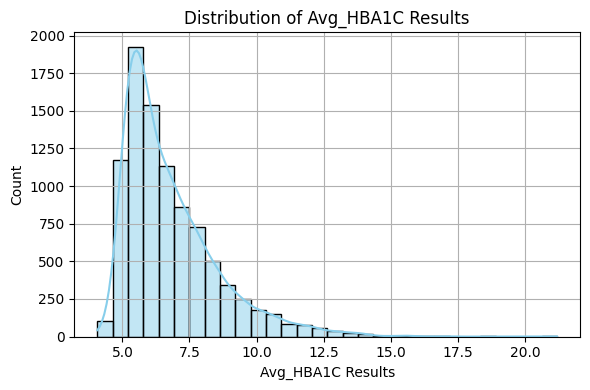

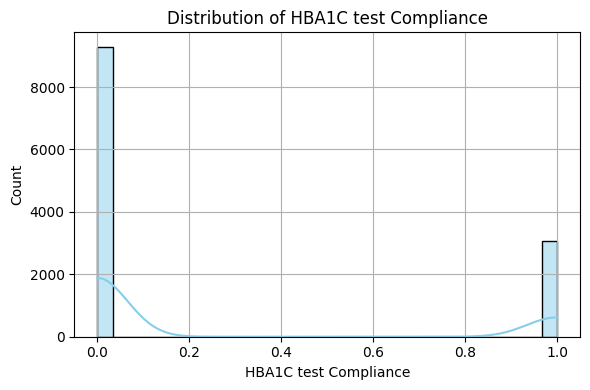

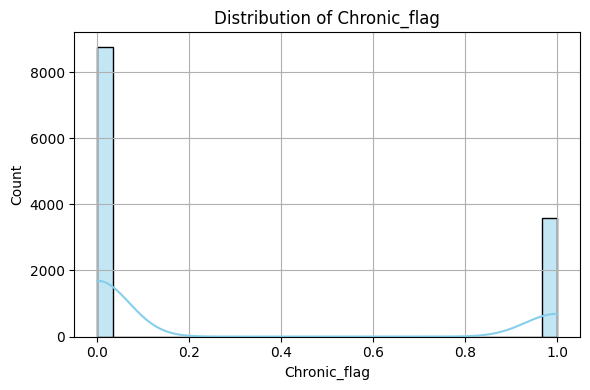

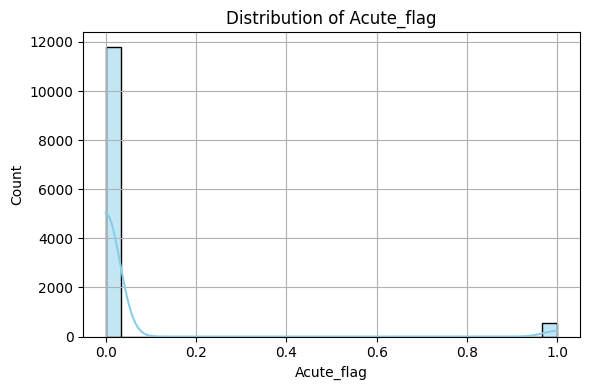

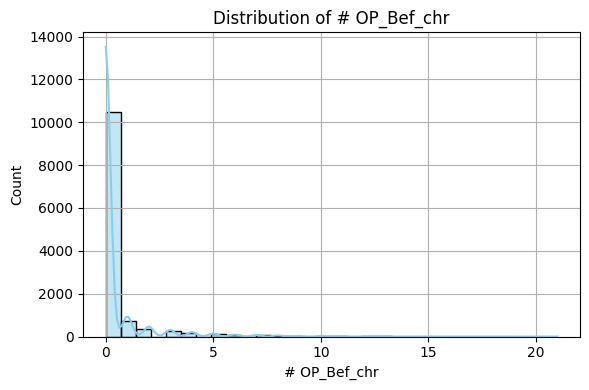

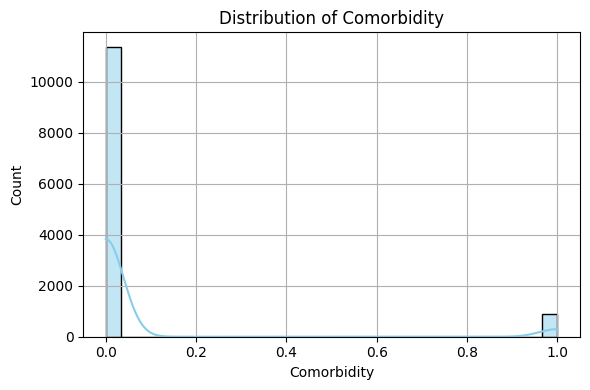

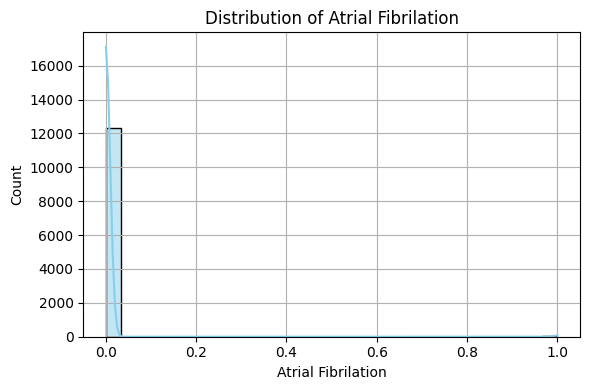

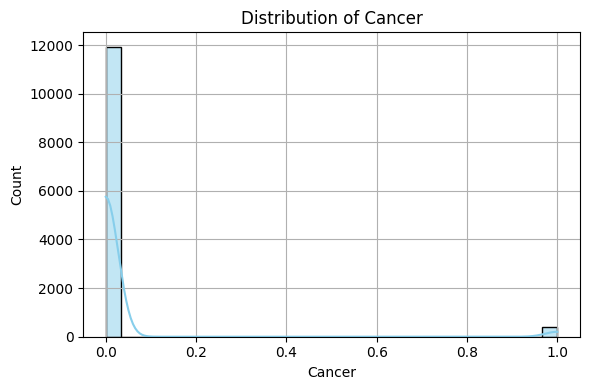

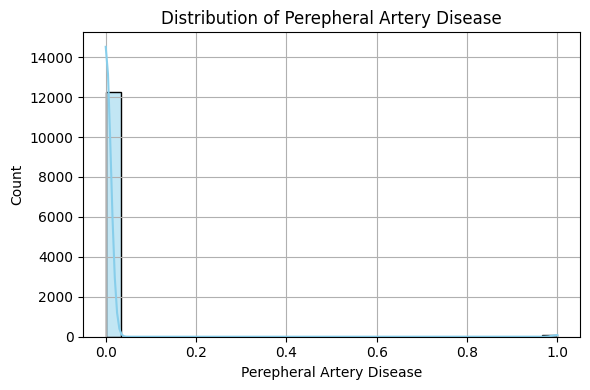

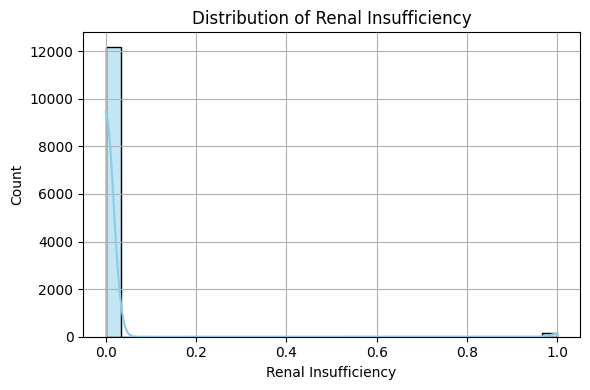

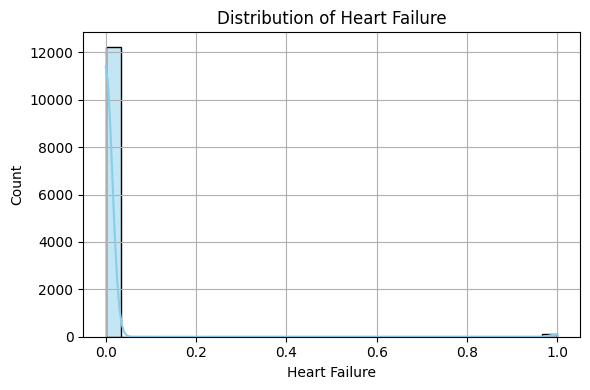

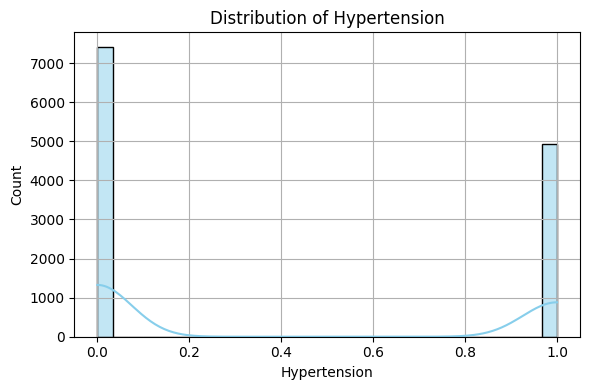

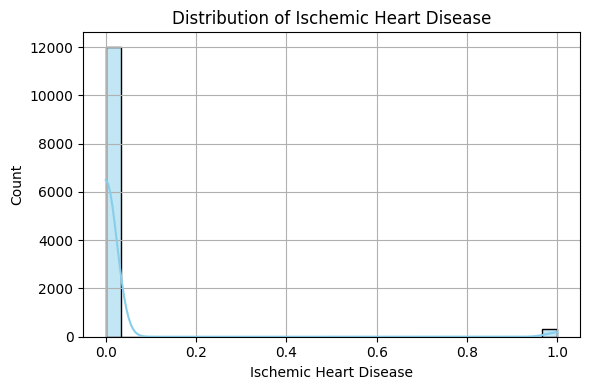

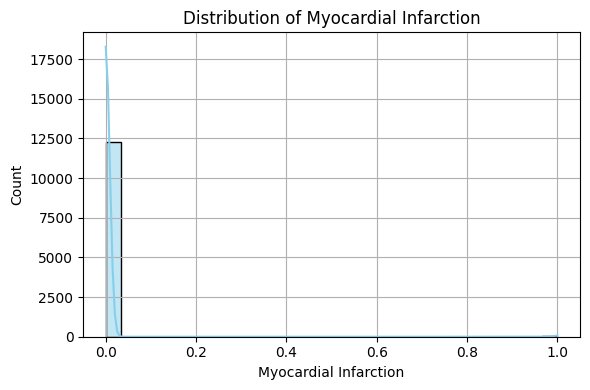

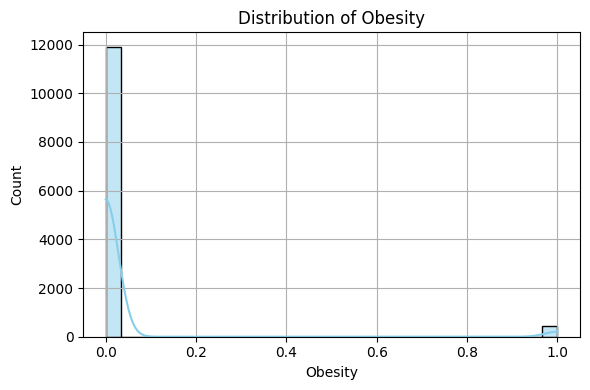

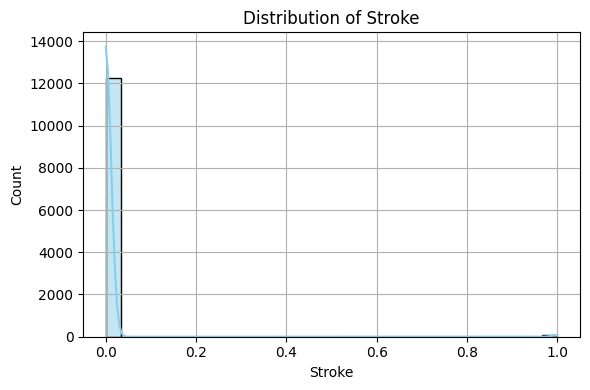

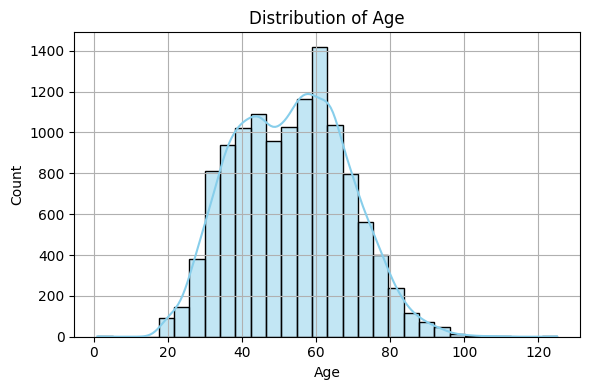

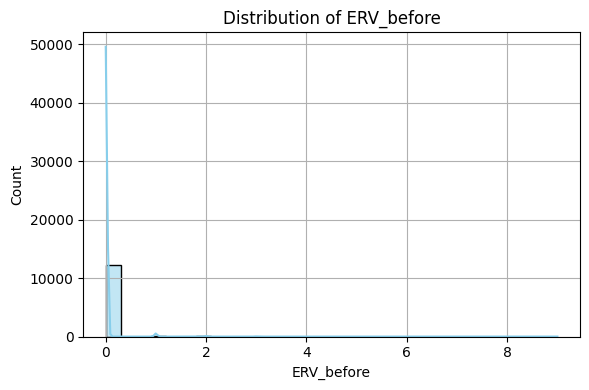

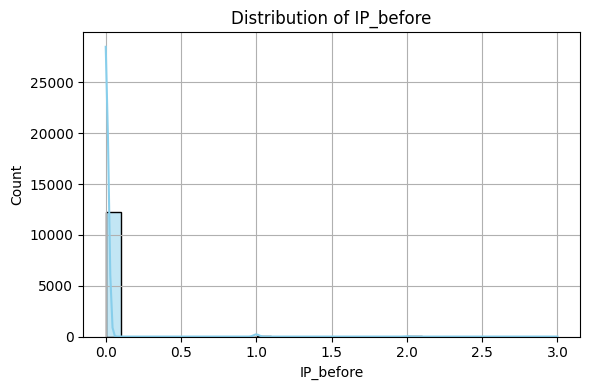

In [6]:

# Automatically select numeric columns from the full DataFrame
numeric_cols = [col for col in Clean_df.columns if pd.api.types.is_numeric_dtype(Clean_df[col])]

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(Clean_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Check distribution of Age and HbA1C level:

In [55]:
for col in ['Age', 'Avg_HBA1C Results'] :
    px.histogram(Clean_df, x=col, marginal="box", width=800).show()

# Check outliers across numerical data:

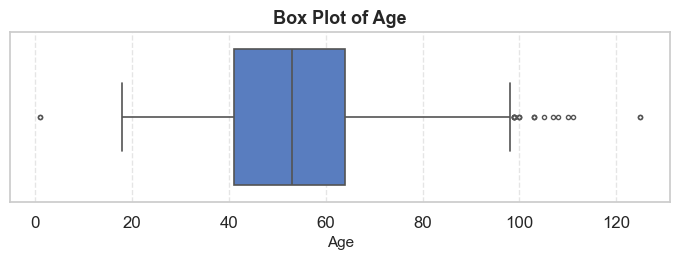

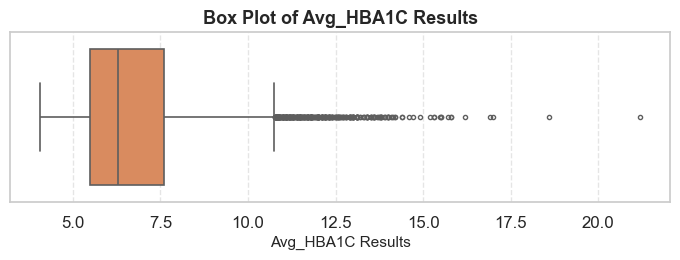

In [12]:
# Choose a professional color palette
palette = sns.color_palette("muted")

# Specify the numeric columns you want to plot
numeric_cols = ['Age', 'Avg_HBA1C Results']

# Plot settings
sns.set(style="whitegrid", font_scale=1.1)

# Generate a box plot for each numeric column
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(7, 2.8))
    sns.boxplot(x=Clean_df[col], color=palette[i % len(palette)], linewidth=1.2, fliersize=3)
    plt.title(f'Box Plot of {col}', fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=11)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



# To be more specified for each analysis:

# 1. Demographic Relationships with chronic flag

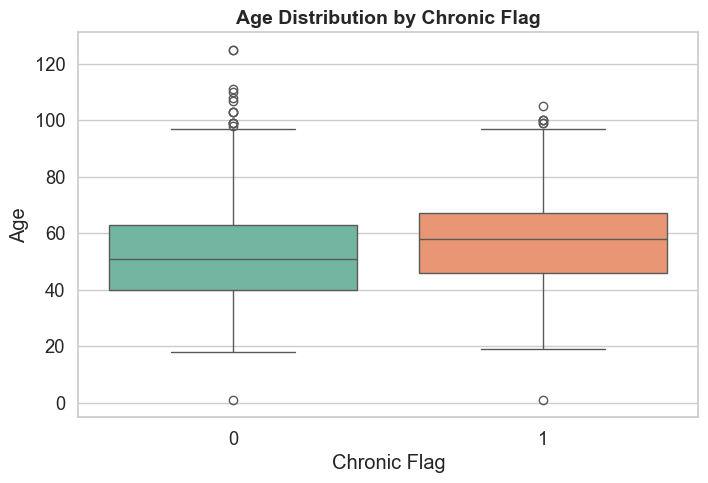

In [19]:

sns.set(style="whitegrid", font_scale=1.2)

# Box plot for Age by Chronic_flag
plt.figure(figsize=(8, 5))
sns.boxplot(x='Chronic_flag', y='Age', data=Clean_df, palette='Set2')
plt.title('Age Distribution by Chronic Flag', fontsize=14, fontweight='bold')
plt.xlabel('Chronic Flag')
plt.ylabel('Age')
plt.show()


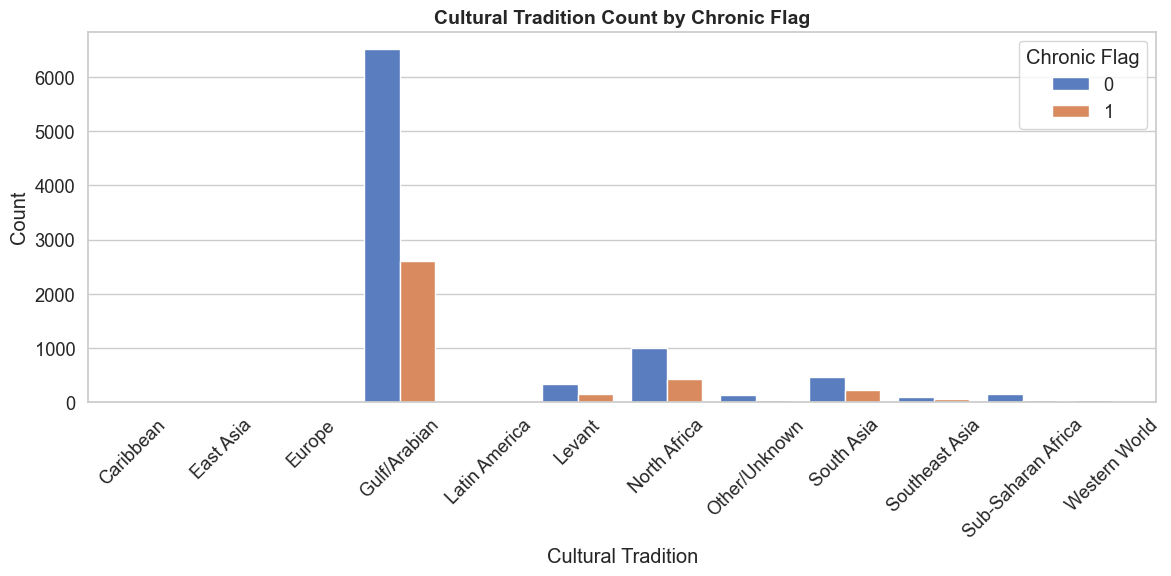

In [20]:
# Count of Cultural Tradition per Chronic Flag
cultural_counts = Clean_df.groupby(['Cultural_Tradition', 'Chronic_flag']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=cultural_counts, x='Cultural_Tradition', y='count', hue='Chronic_flag', palette='muted')
plt.title('Cultural Tradition Count by Chronic Flag', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Cultural Tradition')
plt.ylabel('Count')
plt.legend(title='Chronic Flag')
plt.tight_layout()
plt.show()

In [61]:
Clean_df['Cultural_Tradition'].value_counts()

Cultural_Tradition
Gulf/Arabian          9122
North Africa          1410
South Asia             692
Levant                 487
Other/Unknown          186
Sub-Saharan Africa     186
Southeast Asia         150
Western World           61
Europe                  37
Caribbean                6
East Asia                5
Latin America            3
Name: count, dtype: int64

In [62]:
# Mapping 'Cultural_Tradition' regions to country names
region_to_country_map = {
    "Gulf/Arabian": ["Saudi Arabia", "UAE", "Kuwait", "Qatar", "Oman"],
    "North Africa": ["Egypt", "Morocco", "Algeria", "Tunisia", "Libya"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal"],
    "Levant": ["Syria", "Jordan", "Lebanon", "Palestine", "Iraq"],
    "Other/Unknown": ["Unknown"],  # Handle if you have unknown values
    "Sub-Saharan Africa": ["Nigeria", "Kenya", "Ethiopia", "South Africa"],
    "Southeast Asia": ["Thailand", "Vietnam", "Indonesia", "Malaysia"],
    "Western World": ["USA", "Canada", "Australia", "New Zealand"],
    "Europe": ["UK", "France", "Germany", "Italy", "Spain"],
    "Caribbean": ["Jamaica", "Cuba", "Haiti"],
    "East Asia": ["China", "Japan", "Korea"],
    "Latin America": ["Mexico", "Brazil", "Argentina", "Colombia"]
}


In [63]:
# Add a new column with the mapped country
def map_to_country(cultural_tradition):
    for region, countries in region_to_country_map.items():
        if cultural_tradition == region:
            return countries
    return None  # For unknown regions

Clean_df['Countries'] = Clean_df['Cultural_Tradition'].apply(map_to_country)

# Expand the DataFrame so each row has a single country
expanded_df = Clean_df.explode('Countries')

# Now you can count chronic cases by country
chronic_by_country = expanded_df[expanded_df['Chronic_flag'] == 1].groupby('Countries').size().reset_index(name='Chronic Cases')


In [64]:


# Plotting the choropleth map with countries
fig = px.choropleth(
    chronic_by_country,
    locations='Countries',  # Use the new 'Countries' column
    color='Chronic Cases',
    color_continuous_scale='Reds',
    title='Geographic Distribution of Chronic Cases by Cultural Tradition',
    locationmode='country names'  # Plotly will recognize country names
)

fig.show()


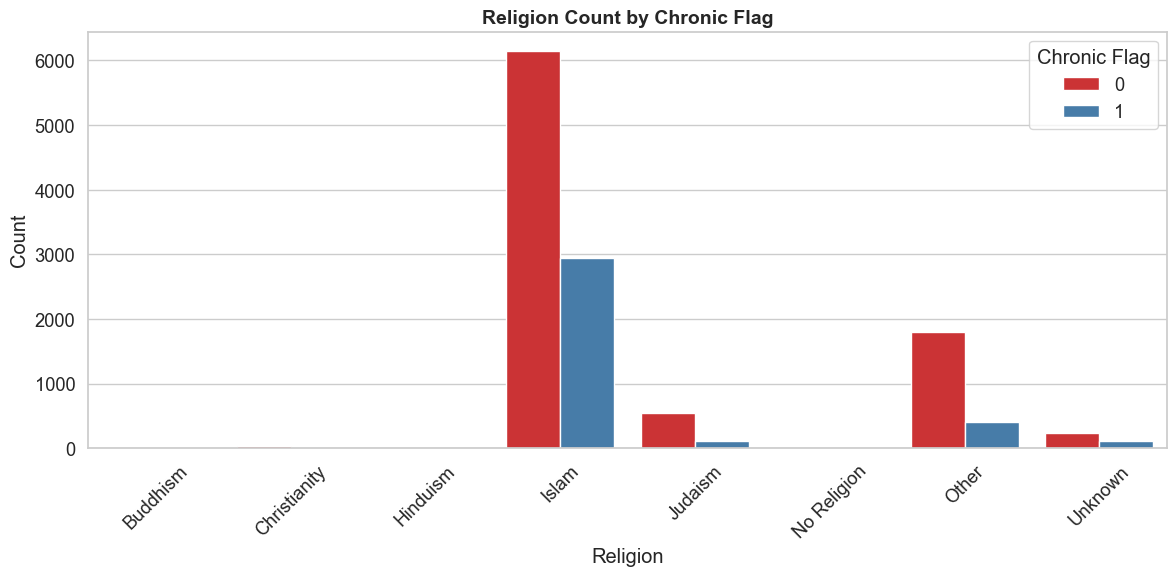

In [21]:
# Count of Religion per Chronic Flag
religion_counts = Clean_df.groupby(['Religion', 'Chronic_flag']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=religion_counts, x='Religion', y='count', hue='Chronic_flag', palette='Set1')
plt.title('Religion Count by Chronic Flag', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Religion')
plt.ylabel('Count')
plt.legend(title='Chronic Flag')
plt.tight_layout()
plt.show()

In [67]:


# Count the chronic cases by 'Religion'
chronic_by_religion = Clean_df[Clean_df['Chronic_flag'] == 1].groupby('Religion').size().reset_index(name='Chronic Cases')

# Plotting a pie chart of chronic cases by religion
fig = px.pie(
    chronic_by_religion,
    names='Religion',
    values='Chronic Cases',
    title='Distribution of Chronic Cases by Religion',
    color='Religion',  # Different colors for each religion
    color_discrete_sequence=px.colors.qualitative.Set3,
     width=1200,  # Width in pixels
    height=600,  # Height in pixels
)

fig.update_traces(textinfo='percent+label')  # Show percentage and label on the pie chart
fig.show()


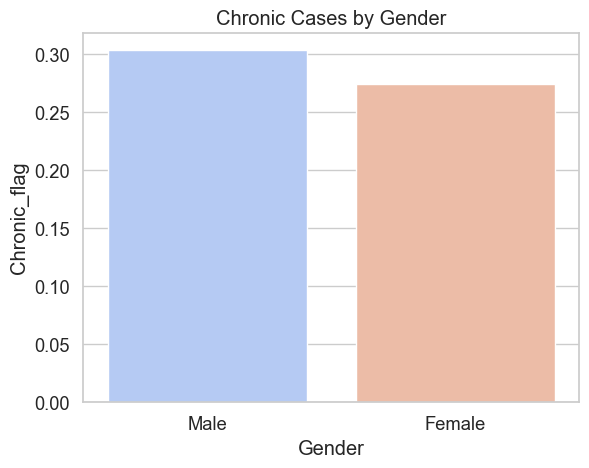

In [23]:
# Gender
# Create the bar plot
sns.barplot(x='Gender', y='Chronic_flag', data=Clean_df, ci=None, palette='coolwarm')

# Set the title for the plot
plt.title('Chronic Cases by Gender')

# Show the plot
plt.show()


#Age and chronic flag relation and effect of sex

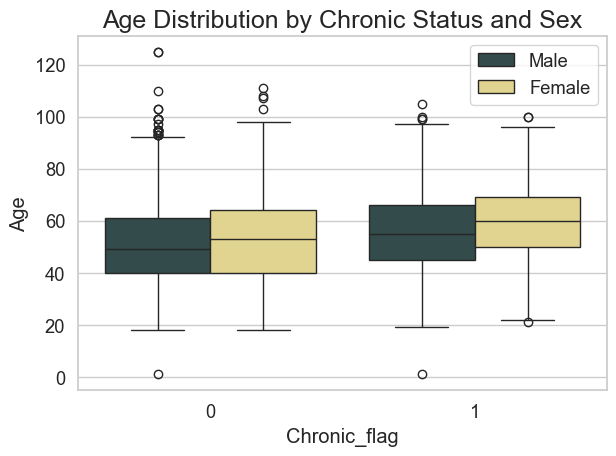

In [48]:

# Boxplot: Age distribution by Chronic_flag and Sex
sns.boxplot(
    x="Chronic_flag", 
    y="Age", 
    hue="Gender", 
    data=Clean_df, 
    palette=sns.color_palette(["#2f4f4f", "#eedd82"])
)

# Title and legend
plt.title("Age Distribution by Chronic Status and Sex", fontsize=18)
plt.legend(loc="best")

plt.tight_layout()
plt.show()



In [57]:
px.scatter(Clean_df, x='Age', y='Avg_HBA1C Results', color='Gender', width=800)

# 2) Medical Metrics Analysis

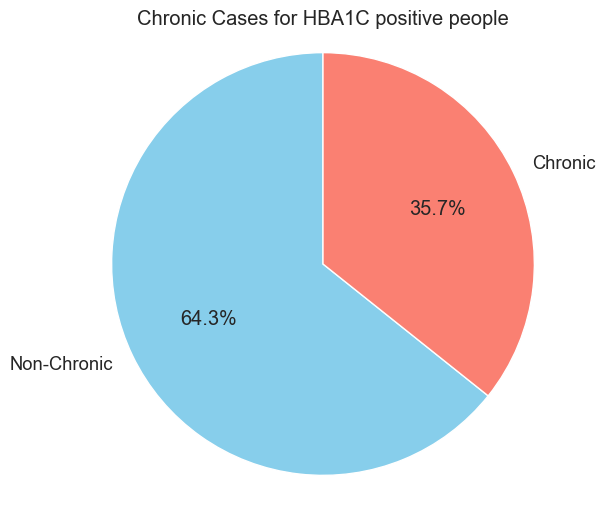

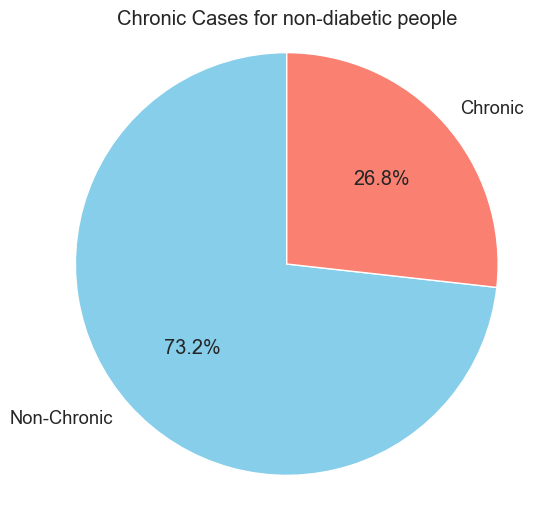

In [26]:
import matplotlib.pyplot as plt

# Filter the dataframe for HBA1C test Compliance == 1
hba1c_compliance_1 = Clean_df[Clean_df['HBA1C test Compliance'] == 1]

# Grouping by 'Chronic_flag' to get the counts for HBA1C Compliance == 1
hba1c_compliance_chronic_1 = hba1c_compliance_1.groupby('Chronic_flag').size()

# Mapping Chronic_flag to labels 'Chronic' and 'Non-Chronic'
labels_1 = ['Chronic' if x == 1 else 'Non-Chronic' for x in hba1c_compliance_chronic_1.index]

# Plotting the pie chart for HBA1C test Compliance == 1
plt.figure(figsize=(6, 6))
plt.pie(hba1c_compliance_chronic_1, labels=labels_1, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Chronic Cases for HBA1C positive people')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Filter the dataframe for HBA1C test Compliance == 0
hba1c_compliance_0 = Clean_df[Clean_df['HBA1C test Compliance'] == 0]

# Grouping by 'Chronic_flag' to get the counts for HBA1C Compliance == 0
hba1c_compliance_chronic_0 = hba1c_compliance_0.groupby('Chronic_flag').size()

# Mapping Chronic_flag to labels 'Chronic' and 'Non-Chronic'
labels_0 = ['Chronic' if x == 1 else 'Non-Chronic' for x in hba1c_compliance_chronic_0.index]

# Plotting the pie chart for HBA1C test Compliance == 0
plt.figure(figsize=(6, 6))
plt.pie(hba1c_compliance_chronic_0, labels=labels_0, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Chronic Cases for non-diabetic people')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()



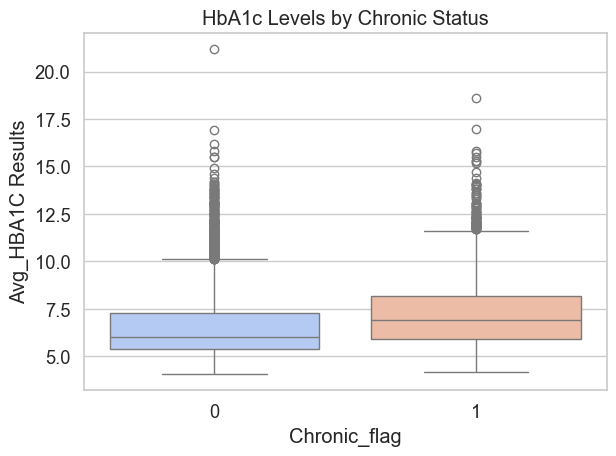

In [29]:
# Create the boxplot
sns.boxplot(x='Chronic_flag', y='Avg_HBA1C Results', data=Clean_df, palette='coolwarm')

# Set the title for the plot
plt.title('HbA1c Levels by Chronic Status')

# Adjust layout to ensure it fits well
plt.tight_layout()

# Show the plot
plt.show()



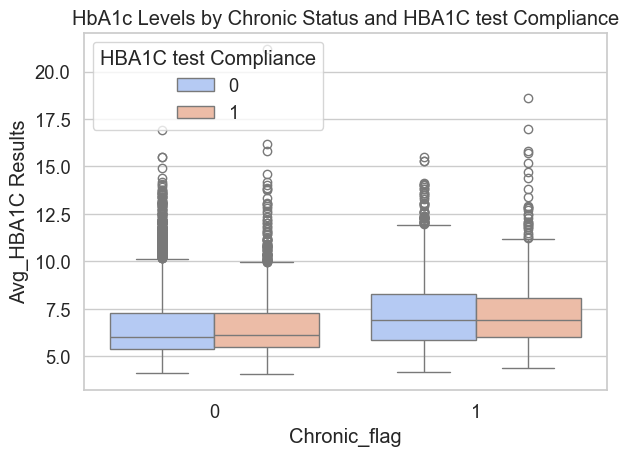

In [33]:
# Create the boxplot with coloring by 'HBA1C test Compliance'
sns.boxplot(x='Chronic_flag', y='Avg_HBA1C Results', data=Clean_df, palette='coolwarm', hue='HBA1C test Compliance')

# Set the title for the plot
plt.title('HbA1c Levels by Chronic Status and HBA1C test Compliance')

# Adjust layout to ensure it fits well
plt.tight_layout()

# Show the plot
plt.show()

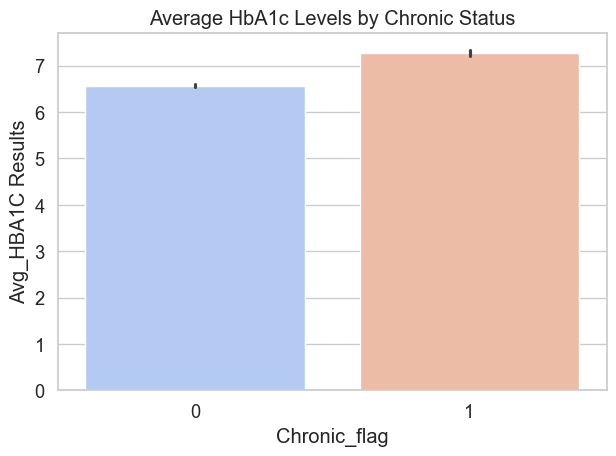

In [32]:
# Create the bar plot showing the mean HbA1c for each Chronic flag
sns.barplot(x='Chronic_flag', y='Avg_HBA1C Results', data=Clean_df, palette='coolwarm')

# Set the title for the plot
plt.title('Average HbA1c Levels by Chronic Status')

# Adjust layout to ensure it fits well
plt.tight_layout()

# Show the plot
plt.show()

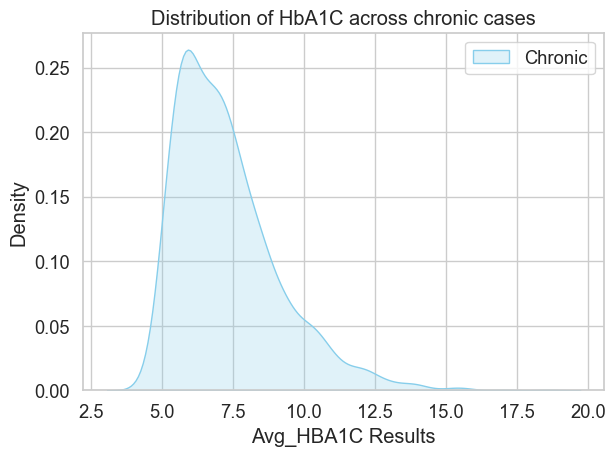

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for 'Chronic_flag' 
chronic_data = Clean_df[Clean_df['Chronic_flag'] == 1]


# Create the KDE plot for Chronic  category
sns.kdeplot(chronic_data['Avg_HBA1C Results'], label='Chronic', fill=True, color='skyblue')


# Set the title for the plot
plt.title('Distribution of HbA1C across chronic cases')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Go deeply across the data:

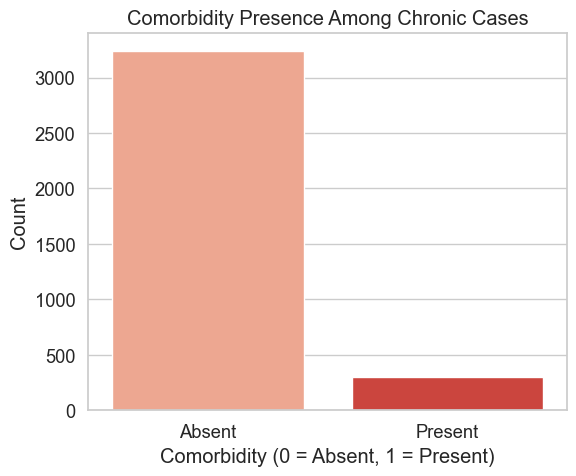

In [42]:
#Comorbidity Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only chronic cases
chronic_only = Clean_df[Clean_df['Chronic_flag'] == 1]

# Create countplot for comorbidity presence in chronic cases
plt.figure(figsize=(6, 5))
sns.countplot(x='Comorbidity', data=chronic_only, palette='Reds')

# Set plot title and labels
plt.title('Comorbidity Presence Among Chronic Cases')
plt.xlabel('Comorbidity (0 = Absent, 1 = Present)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

plt.tight_layout()
plt.show()


# We need to check the Comorbidity Analysis in details:

In [43]:
# In need to retrieve % of comorbidity that causes chronic flag:
import plotly.express as px

# Filter the dataset to include only chronic cases
chronic_df = Clean_df[Clean_df['Chronic_flag'] == 1]

# List of comorbidity columns to analyze
comorbidities = [
    'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
    'Renal Insufficiency', 'Heart Failure', 'Hypertension',
    'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke'
]

# List to store percentage values
comorbidity_percentages = []

# Calculate presence percentage for each comorbidity in chronic patients
for column in comorbidities:
    total_chronic = chronic_df.shape[0]
    count_with_comorbidity = chronic_df[chronic_df[column] == 1].shape[0]
    
    if total_chronic > 0:
        percentage = count_with_comorbidity / total_chronic * 100
    else:
        percentage = 0

    print(f"Percentage of chronic patients with {column}: {percentage:.2f}%")
    comorbidity_percentages.append(percentage)

# Plotting the result using Plotly bar chart
fig = px.bar(
    x=comorbidities,
    y=comorbidity_percentages,
    text=[f"{p:.1f}%" for p in comorbidity_percentages],
    title="Chronic Percentage for Each Risk Factor (Reflecting the effect of each on chronic flag)",
    labels={'x': 'Comorbidities', 'y': 'Percentage'},
    color=comorbidity_percentages,
    color_continuous_scale='Reds'
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_range=[0, 100])

fig.show()


Percentage of chronic patients with Atrial Fibrilation: 0.56%
Percentage of chronic patients with Cancer: 3.77%
Percentage of chronic patients with Perepheral Artery Disease: 1.90%
Percentage of chronic patients with Renal Insufficiency: 2.68%
Percentage of chronic patients with Heart Failure: 2.85%
Percentage of chronic patients with Hypertension: 50.36%
Percentage of chronic patients with Ischemic Heart Disease: 9.31%
Percentage of chronic patients with Myocardial Infarction: 0.95%
Percentage of chronic patients with Obesity: 3.19%
Percentage of chronic patients with Stroke: 2.12%


In [ ]:
# Hypertension has  great effect on the progression to critical conditions, then Ischemic heart disease

In [69]:
print(Clean_df.columns)

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality_cleaned', 'Cultural_Tradition', 'Age', 'ERV_before',
       'IP_before', 'Countries'],
      dtype='object')


In [77]:
import plotly.express as px

# Filter patients with Hypertension
hypertension_data = Clean_df[Clean_df['Hypertension'] == 1]

# Count chronic vs non-chronic
chronic_counts = hypertension_data['Chronic_flag'].value_counts().reset_index()
chronic_counts.columns = ['Chronic_flag', 'Count']
chronic_counts['Chronic_flag'] = chronic_counts['Chronic_flag'].map({
    0: 'Non-Chronic',
    1: 'Chronic'
})

# Plot
fig = px.pie(
    chronic_counts, 
    names='Chronic_flag', 
    values='Count',
    title='Chronic Status Among Patients with Hypertension',
    color='Chronic_flag',
    color_discrete_map={'Chronic': 'darkred', 'Non-Chronic': 'lightgray'}
)
fig.show()



In [80]:
import plotly.express as px

# Filter only chronic patients
chronic_patients = Clean_df[Clean_df['Chronic_flag'] == 1]

# Count how many have or don't have hypertension
hypertension_counts = chronic_patients['Hypertension'].value_counts().reset_index()
hypertension_counts.columns = ['Hypertension', 'Count']
hypertension_counts['Hypertension'] = hypertension_counts['Hypertension'].map({
    0: 'No Hypertension',
    1: 'Has Hypertension'
})

# Create pie chart
fig = px.pie(
    hypertension_counts,
    names='Hypertension',
    values='Count',
    title='Hypertension Presence Among Chronic Patients',
    color='Hypertension',
    color_discrete_map={
        'Has Hypertension': 'firebrick',
        'No Hypertension': 'lightblue'
    })
fig.show()

In [81]:
# Filter only chronic patients
chronic_patients = Clean_df[Clean_df['Chronic_flag'] == 1]

# Count how many have or don't have hypertension
hypertension_counts = chronic_patients['Ischemic Heart Disease'].value_counts().reset_index()
hypertension_counts.columns = ['Ischemic Heart Disease', 'Count']
hypertension_counts['Ischemic Heart Disease'] = hypertension_counts['Ischemic Heart Disease'].map({
    0: 'No Ischemic Heart Disease',
    1: 'Has Ischemic Heart Disease'
})

# Create pie chart
fig = px.pie(
    hypertension_counts,
    names='Ischemic Heart Disease',
    values='Count',
    title='Ischemic Heart Disease Presence Among Chronic Patients',
    color='Ischemic Heart Disease',
    color_discrete_map={
        'Has Ischemic Heart Disease': 'firebrick',
        'No Ischemic Heart Disease': 'lightblue'
    })
fig.show()

# Healthcare Utilization Patterns 

In [82]:
Clean_df.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality_cleaned', 'Cultural_Tradition', 'Age', 'ERV_before',
       'IP_before', 'Countries'],
      dtype='object')

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define your metrics
utilization_metrics = ['ERV_before', 'IP_before', '# OP_Bef_chr']

# Create subplot with 3 plots side by side
fig = make_subplots(rows=1, cols=3, subplot_titles=utilization_metrics)

# Add each boxplot
for i, metric in enumerate(utilization_metrics):
    fig.add_trace(
        go.Box(
            y=Clean_df[metric],
            x=Clean_df['Chronic_flag'].astype(str),  # convert to string for clearer labels
            name=metric,
            marker_color='indianred' if i % 2 == 0 else 'steelblue',
            boxmean='sd'
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title_text='Utilization Metrics by Chronic Status',
    showlegend=False,
    height=500,
    width=1100
)

# Label axes for each subplot
for i in range(3):
    fig.update_xaxes(title_text='Chronic_flag (0 = Non-Chronic, 1 = Chronic)', row=1, col=i+1)
    fig.update_yaxes(title_text='Count', row=1, col=i+1)

fig.show()


# Effect of acute on chronic flag:

In [ ]:
# % of acute cases that are also chronic
acute_to_chronic_pct = Clean_df[(Clean_df['Acute_flag'] == 1) & (Clean_df['Chronic_flag'] == 1)].shape[0] / Clean_df[Clean_df['Acute_flag'] == 1].shape[0] * 100
print(f"Percentage of Acute cases that are developed to Chronic: {acute_to_chronic_pct:.2f}%")


Percentage of Acute cases that are also Chronic: 96.14%


In [87]:

import plotly.graph_objects as go

# Calculate the percentage
acute_to_chronic_pct = Clean_df[(Clean_df['Acute_flag'] == 1) & (Clean_df['Chronic_flag'] == 1)].shape[0] / Clean_df[Clean_df['Acute_flag'] == 1].shape[0] * 100

# Create gauge chart
fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=acute_to_chronic_pct,
    delta={'reference': 50, 'increasing': {'color': "crimson"}},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 25], 'color': "#d4f1f9"},
            {'range': [25, 50], 'color': "#a6dcef"},
            {'range': [50, 75], 'color': "#74b9ff"},
            {'range': [75, 100], 'color': "#0984e3"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': acute_to_chronic_pct
        }
    },
    title={'text': "Acute Cases That Progressed to Chronic (%)"}
))

fig.update_layout(height=400)
fig.show()


In [88]:
import plotly.graph_objects as go

# Calculate the percentage of acute cases that developed into chronic cases
acute_to_chronic_pct = Clean_df[(Clean_df['Acute_flag'] == 1) & (Clean_df['Chronic_flag'] == 1)].shape[0] / Clean_df[Clean_df['Acute_flag'] == 1].shape[0] * 100
non_acute_to_chronic_pct = Clean_df[(Clean_df['Acute_flag'] == 0) & (Clean_df['Chronic_flag'] == 1)].shape[0] / Clean_df[Clean_df['Acute_flag'] == 0].shape[0] * 100

# Create a bar chart comparing acute vs non-acute progression
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Acute Cases', 'Non-Acute Cases'],
    y=[acute_to_chronic_pct, non_acute_to_chronic_pct],
    name='Progression to Chronic',
    marker_color=['#74b9ff', '#0984e3']
))

fig.update_layout(
    title="Progression to Chronic by Acute Status",
    xaxis_title="Acute Status",
    yaxis_title="Percentage (%)",
    showlegend=False,
    height=500,
    width=700,
    template="plotly_dark"
)

fig.show()


In [89]:
Clean_df.columns

Index(['Gender', 'Religion', 'Avg_HBA1C Results', 'HBA1C test Compliance',
       'Chronic_flag', 'Acute_flag', '# OP_Bef_chr', 'Comorbidity',
       'Atrial Fibrilation', 'Cancer', 'Perepheral Artery Disease',
       'Renal Insufficiency', 'Heart Failure', 'Hypertension',
       'Ischemic Heart Disease', 'Myocardial Infarction', 'Obesity', 'Stroke',
       'Nationality_cleaned', 'Cultural_Tradition', 'Age', 'ERV_before',
       'IP_before', 'Countries'],
      dtype='object')